In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\sа-яА-Яa-zA-Z0-9@\[\]]',' ',text) # Удаляет пунктцацию
    text = re.sub(r'\w*\d+\w*', '', text) # Удаляет цифры
    text = re.sub('\s{2,}', " ", text) # Удаляет ненужные пробелы
    text = text.replace('\n', ' ')
    return text

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize 

sentence = 'НоЧь. Улица. фоНАРЬ. АптекА'
list_tokens = word_tokenize(clean_text(sentence))
list_tokens

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(list_tokens)
fdist

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
wordcloud = WordCloud().generate(' '.join(list_tokens))
wordcloud

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('movie_reviews')

In [ ]:
import nltk
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
!pip install NRCLex

In [ ]:
from nrclex import NRCLex

text = ['hate', 'lovely', 'person', 'where']
for i in range(len(text)):
    # creating objects
    emotion = NRCLex(text[i])
    print('\n\n', text[i], ': ', emotion.top_emotions)

In [ ]:
!pip install transformers
!pip install datasets

In [ ]:
pip install --upgrade pip

In [ ]:
!pip uninstall -y urllib3
!pip install --upgrade urllib3

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import transformers

# tokenizer = transformers.AutoTokenizer.from_pretrained("nateraw/bert-base-uncased-emotion", use_fast=True).cuda()
# print('hey')
model = transformers.AutoModelForSequenceClassification.from_pretrained("nateraw/bert-base-uncased-emotion").cuda()
print('hey')

pred = transformers.pipeline("text-classification", model=model, device=0, return_all_scores=True)
print('hey')


In [63]:
from transformers import pipeline
pred = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
pred("I love this!")[0]

[{'label': 'anger', 'score': 0.004419790115207434},
 {'label': 'disgust', 'score': 0.001611991785466671},
 {'label': 'fear', 'score': 0.0004138524236623198},
 {'label': 'joy', 'score': 0.9771687984466553},
 {'label': 'neutral', 'score': 0.005764586851000786},
 {'label': 'sadness', 'score': 0.002092393347993493},
 {'label': 'surprise', 'score': 0.008528688922524452}]

In [64]:
def get_sent(text):
  sents = pred(text)[0]
  answer = {}
  for sent in sents:
    emotion = sent['label']
    score = sent['score']
    answer[emotion] = score
  return answer
get_sent('never gonna let u down')

{'anger': 0.7778908610343933,
 'disgust': 0.02338601090013981,
 'fear': 0.031419068574905396,
 'joy': 0.007709283847361803,
 'neutral': 0.054323263466358185,
 'sadness': 0.10270387679338455,
 'surprise': 0.0025676139630377293}

In [65]:
def get_emotion(text):
  sents = get_sent(text)
  max_em, max_score = None, -1
  for sent in sents:
    if sents[sent] > max_score:
      max_em, max_score = sent, sents[sent]
  return max_em
get_emotion('Suck')

'disgust'

In [98]:
messages = {
    '01/01/2022': 'You are crazy bro',
    '02/01/2022': 'Yo cool',
    '03/01/2022': 'Lalala lend',
    '04/01/2022': 'You are my heart',
    '05/01/2022': 'You are my soul',
    '06/01/2022': 'never gonna give u up',
    '07/01/2022': 'never gonna let u down',
    '08/01/2022': 'I am sorry(',
    '09/01/2022': 'Im crying',
    '10/01/2022': 'Never let me down again',
    '11/01/2022': 'YEAG',
    '12/01/2022': 'Pretty cool',
    '13/01/2022': 'Wtf????',
    '14/01/2022': 'hello buddy',
    '15/01/2022': 'Hasta la vista baby',
    '16/01/2022': 'Ill be back',
    }

In [99]:
import datetime
def to_integer(str_time):
  dt_time = datetime.datetime.strptime(str_time, '%d/%m/%Y')
  return 10000*dt_time.year + 100*dt_time.month + dt_time.day
to_integer('02/01/2022')

ys, xs = [], []
for date in messages:
  xs.append(to_integer(date))
  ys.append(get_sent(messages[date]))

In [100]:
ys

[{'anger': 0.7851327061653137,
  'disgust': 0.12245629727840424,
  'fear': 0.009206201881170273,
  'joy': 0.005706241354346275,
  'neutral': 0.0352666974067688,
  'sadness': 0.01345901656895876,
  'surprise': 0.028772899881005287},
 {'anger': 0.01766585186123848,
  'disgust': 0.011182518675923347,
  'fear': 0.003203500062227249,
  'joy': 0.476502388715744,
  'neutral': 0.3637031614780426,
  'sadness': 0.014830176718533039,
  'surprise': 0.11291241645812988},
 {'anger': 0.00459857564419508,
  'disgust': 0.004817060194909573,
  'fear': 0.004957625642418861,
  'joy': 0.0033432859927415848,
  'neutral': 0.9581055641174316,
  'sadness': 0.009828897193074226,
  'surprise': 0.014348979108035564},
 {'anger': 0.024402260780334473,
  'disgust': 0.013634636066854,
  'fear': 0.02144729159772396,
  'joy': 0.10059425234794617,
  'neutral': 0.7079538702964783,
  'sadness': 0.08932171761989594,
  'surprise': 0.04264586418867111},
 {'anger': 0.024965103715658188,
  'disgust': 0.05659373477101326,
  'fe

In [101]:
datasets_dict = {}
plot_dicts = []

for emotion in list(ys[0].keys()):
    datasets_dict[emotion] = []
    for point in ys:
        datasets_dict[emotion].append(point[emotion])

for emotion in datasets_dict:
    plot_dicts.append({'Time': xs, f'{emotion}_level': datasets_dict[emotion]})
plot_dicts

[{'Time': [20220101,
   20220102,
   20220103,
   20220104,
   20220105,
   20220106,
   20220107,
   20220108,
   20220109,
   20220110,
   20220111,
   20220112,
   20220113,
   20220114,
   20220115,
   20220116],
  'anger_level': [0.7851327061653137,
   0.01766585186123848,
   0.00459857564419508,
   0.024402260780334473,
   0.024965103715658188,
   0.3556050658226013,
   0.7778908610343933,
   0.0027821592520922422,
   0.000998597126454115,
   0.571813702583313,
   0.02645721100270748,
   0.0025483532808721066,
   0.5152037739753723,
   0.007039797957986593,
   0.01243466604501009,
   0.004327369853854179]},
 {'Time': [20220101,
   20220102,
   20220103,
   20220104,
   20220105,
   20220106,
   20220107,
   20220108,
   20220109,
   20220110,
   20220111,
   20220112,
   20220113,
   20220114,
   20220115,
   20220116],
  'disgust_level': [0.12245629727840424,
   0.011182518675923347,
   0.004817060194909573,
   0.013634636066854,
   0.05659373477101326,
   0.04069037362933159,
 

ValueError: Unrecognized character a in format string

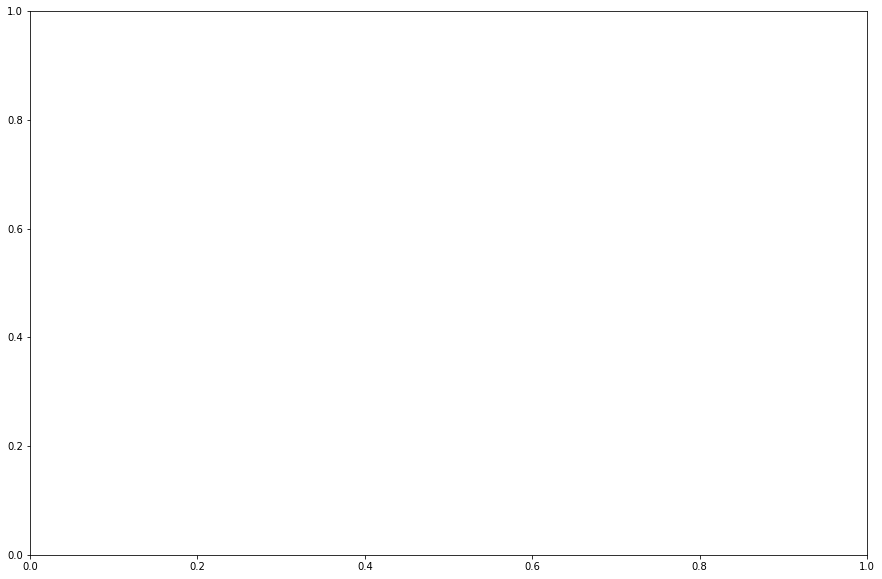

In [102]:
def get_plot(messages, user_id):
    ys, xs = [], []
    for date in messages:
      xs.append(to_integer(date))
      ys.append(get_sent(messages[date]))
    
    datasets_dict = {}
    plot_dicts = []

    for emotion in list(ys[0].keys()):
        datasets_dict[emotion] = []
        for point in ys:
            datasets_dict[emotion].append(point[emotion])

    for emotion in datasets_dict:
        plot_dicts.append({'Time': xs, f'{emotion}_level': datasets_dict[emotion]})
    
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Data
    sadness_level = pd.DataFrame(plot_dicts[0])
    joy_level = pd.DataFrame(plot_dicts[1])
    love_level = pd.DataFrame(plot_dicts[2])
    anger_level = pd.DataFrame(plot_dicts[3])
    fear_level = pd.DataFrame(plot_dicts[4])
    surprise_level = pd.DataFrame(plot_dicts[5])


    fig = plt.figure(figsize=(15, 10))


    # multiple line plot
    plt.plot('Time','sadness_level',data=sadness_level,marker='o',color='blue',linewidth=2)
    plt.plot('Time','love_level',data=love_level,marker='o',color='red',linewidth=2)
    plt.plot('Time','joy_level',data=joy_level,marker='o',color='green',linewidth=2)
    plt.plot('Time','fear_level',data=fear_level,marker='o',color='brown',linewidth=2)
    plt.plot('Time','anger_level',data=anger_level,marker='o',color='black',linewidth=2)
    plt.plot('Time','surprise_level',data=surprise_level,marker='o',color='orange',linewidth=2)

    plt.legend(loc='upper left')

    fig.savefig(f'{str(user_id)}.png')

get_plot(messages, 123)

In [103]:
def to_freq(x, y):
    from scipy.fft import fft, fftfreq

    yf = fft(y)
    xf = x

    plt.plot(xf, np.abs(yf))
    plt.show()

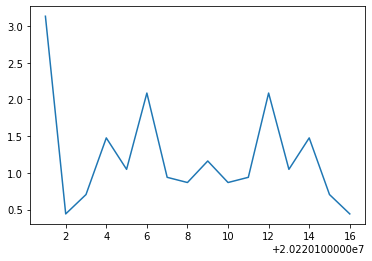

In [104]:
to_freq(plot_dicts[0]['Time'], plot_dicts[0]['anger_level'])

In [73]:
from scipy.fft import fft, fftfreq
fftfreq(10, 1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

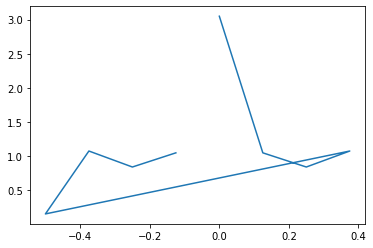

In [36]:
to_freq([0.1, 0.3, 0.05, 0.3, 0.5, 0.1, 0.8, 0.9], 1, 8)

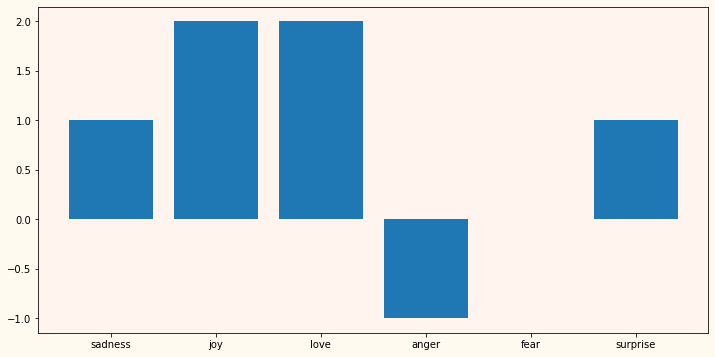

In [107]:
def get_difference(vector_user, vector_average, user_id):
    import numpy as np
    import matplotlib.pyplot as plt

    x = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']    
    y = [vector_user[u] - vector_average[a] for u, a in zip(list(vector_user.keys()), list(vector_average.keys()))]

    fig, ax = plt.subplots()

    ax.bar(x, y)

    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)
    fig.set_figheight(6)

    fig.savefig(f'{str(user_id)}.png')

get_temper([1, 2, 2, -1, 0, 1], 123)

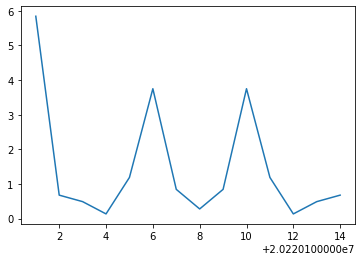

In [105]:
messages = {
    '01/01/2022': 'Fuck you bitch',
    '02/01/2022': 'Suck dick',
    '03/01/2022': 'Bitch',
    '04/01/2022': 'Go away fucker',
    '05/01/2022': 'Hahah',
    '06/01/2022': 'Bitch',
    '07/01/2022': 'Go away fucker',
    '08/01/2022': 'Hahah',
    '09/01/2022': 'Bitch',
    '10/01/2022': 'Go away fucker',
    '11/01/2022': 'Hahah',
    '12/01/2022': 'Bitch',
    '13/01/2022': 'Go away fucker',
    '14/01/2022': 'Hahah'
    }


ys, xs = [], []
for date in messages:
  xs.append(to_integer(date))
  ys.append(get_sent(messages[date]))

datasets_dict = {}
plot_dicts = []

for emotion in list(ys[0].keys()):
    datasets_dict[emotion] = []
    for point in ys:
        datasets_dict[emotion].append(point[emotion])

for emotion in datasets_dict:
    plot_dicts.append({'Time': xs, f'{emotion}_level': datasets_dict[emotion]})

to_freq(plot_dicts[0]['Time'], plot_dicts[0]['anger_level'])